# Obesity data exploration 


<b>Author:</b> Przemyslaw Niedziela (przemyslaw.niedziela98@gmail.com) <br> 
<b>Date:</b> Dec 2024 <br>
<br> <br> 

TL;DR <br>
WIP

<br> <br> 
Table of contents: 
1. [Basic Exploratory Analysis](#basic-exploratory-analysis)
2. [Correlation Analysis](#correlation-analysis)
3. [Geospatial Analysis](#geospatial-analysis)

In [1]:
import warnings
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

### Basic Exploratory Analysis 

In [3]:
print(df.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [5]:
print(df.describe())

           YearStart        YearEnd  Data_Value_Unit    Data_Value  \
count  104272.000000  104272.000000     88872.000000  93505.000000   
mean     2017.006176    2017.006176      2016.019534     31.849359   
std         3.734882       3.734882         3.120714     10.417933   
min      2011.000000    2011.000000      2011.000000      0.900000   
25%      2014.000000    2014.000000      2013.000000     24.900000   
50%      2017.000000    2017.000000      2016.000000     31.700000   
75%      2020.000000    2020.000000      2019.000000     37.500000   
max      2023.000000    2023.000000      2021.000000     85.300000   

       Data_Value_Alt  Low_Confidence_Limit  High_Confidence_Limit   \
count    93505.000000          93505.000000            93505.000000   
mean        31.849359             27.452834               36.803022   
std         10.417933             10.204503               11.343284   
min          0.900000              0.300000                3.000000   
25%         24

In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                15400
Data_Value_Type                    0
Data_Value                     10767
Data_Value_Alt                 10767
Data_Value_Footnote_Symbol     93505
Data_Value_Footnote            93505
Low_Confidence_Limit           10767
High_Confidence_Limit          10767
Sample_Size                    10767
Total                         100548
Age(years)                     81928
Education                      89376
Gender                         96824
Income                         78204
Race/Ethnicity                 74480
GeoLocation                     1932
ClassID                            0
TopicID                            0
QuestionID

In [7]:
print(df['Question'].unique())

['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who report consuming fru

In [8]:
print(df['Topic'].unique())

['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']


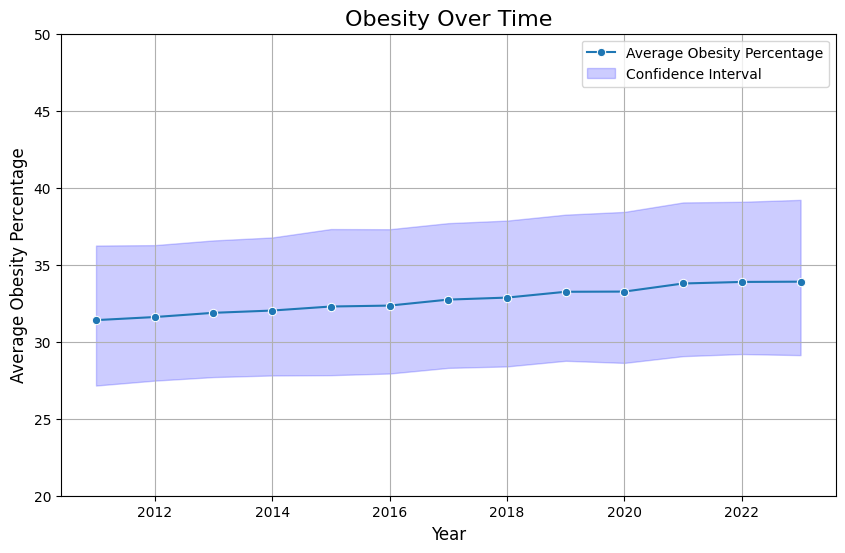

In [9]:
obesity_df = df[df['Class'] == 'Obesity / Weight Status']

obesity_trends = obesity_df.groupby('YearStart')['Data_Value'].mean().reset_index()
obesity_trends.columns = ['Year', 'Average Obesity Percentage']
confidence_limits = (obesity_df
    .groupby('YearStart')
    .agg({
        'Low_Confidence_Limit': 'mean', 
        'High_Confidence_Limit ': 'mean'
    })
    .reset_index()
    .rename({'YearStart': 'Year'}, axis = 1)
)

obesity_trends = pd.merge(obesity_trends, confidence_limits, on='Year')
plt.figure(figsize=(10, 6))
sns.lineplot(data=obesity_trends, x='Year', y='Average Obesity Percentage', marker='o', label='Average Obesity Percentage')
plt.fill_between(obesity_trends['Year'], obesity_trends['Low_Confidence_Limit'], obesity_trends['High_Confidence_Limit '], color='blue', alpha=0.2, label='Confidence Interval')

plt.title('Obesity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Obesity Percentage', fontsize=12)
plt.grid(True)
plt.legend()
plt.ylim([20, 50]) 
plt.show()


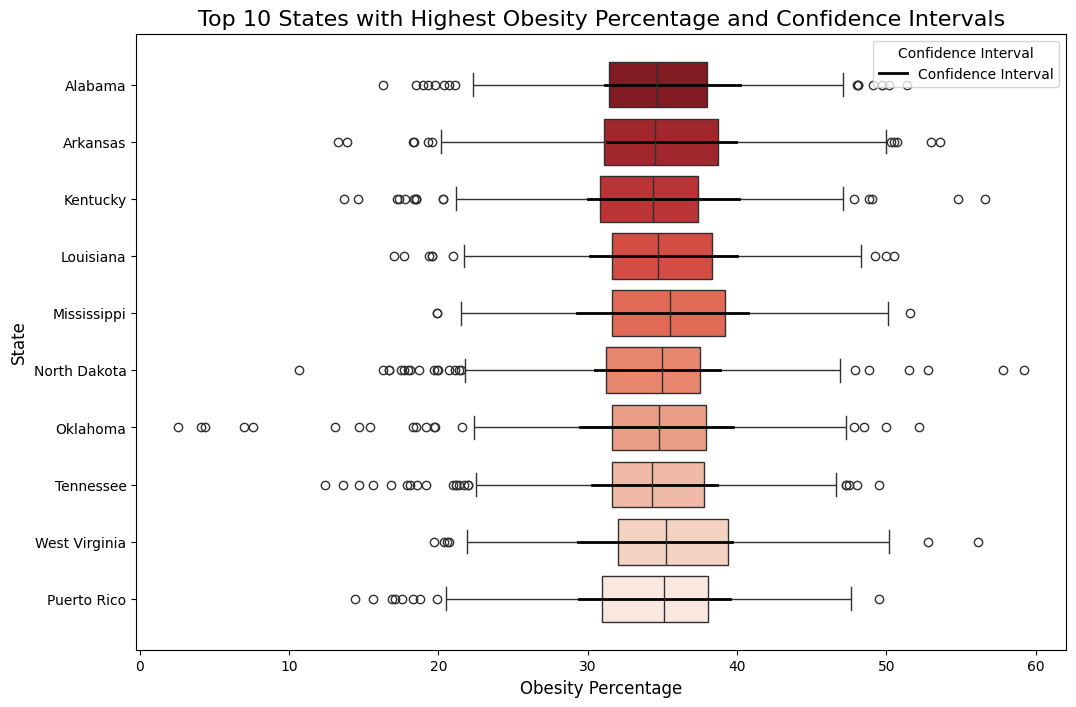

In [10]:
state_obesity = obesity_df.groupby('LocationDesc')['Data_Value'].mean().reset_index()
state_obesity.columns = ['State', 'Average Obesity Percentage']
top_10_states = state_obesity.sort_values(by='Average Obesity Percentage', ascending=False).head(10)
plt.figure(figsize=(12, 8))

sns.boxplot(data=obesity_df[obesity_df['LocationDesc'].isin(top_10_states['State'])], 
            x='Data_Value', y='LocationDesc', palette='Reds_r')

confidence_limits = obesity_df.groupby('LocationDesc').agg({
    'Low_Confidence_Limit': 'mean', 
    'High_Confidence_Limit ': 'mean'
}).reset_index()

top_10_states = pd.merge(top_10_states, confidence_limits, left_on='State', right_on='LocationDesc', how='left')

for i, row in top_10_states.iterrows():
    plt.plot([row['Low_Confidence_Limit'], row['High_Confidence_Limit ']], [i, i], color='black', linewidth=2, label='Confidence Interval' if i == 0 else "")
    
plt.title('Top 10 States with Highest Obesity Percentage and Confidence Intervals', fontsize=16)
plt.xlabel('Obesity Percentage', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Confidence Interval', loc='upper right')
plt.show()


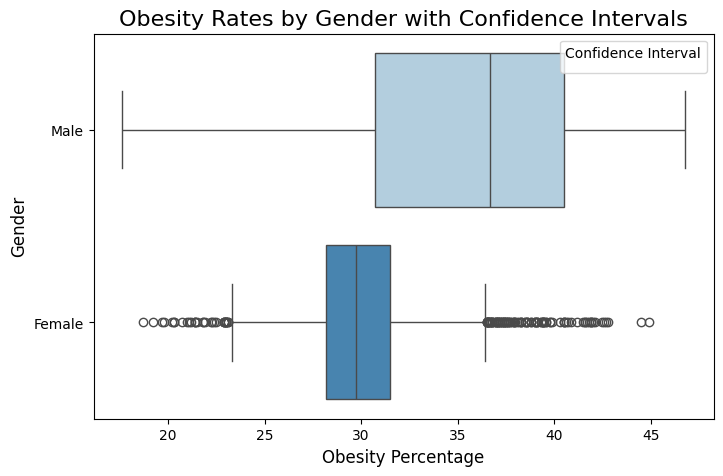

In [11]:
gender_obesity = obesity_df.groupby('Gender')['Data_Value'].mean().reset_index()
gender_obesity.columns = ['Gender', 'Average Obesity Percentage']

plt.figure(figsize=(8, 5))
sns.boxplot(data=obesity_df[obesity_df['Gender'].isin(gender_obesity['Gender'])], 
            x='Data_Value', y='Gender', palette='Blues')
confidence_limits = obesity_df.groupby('Gender').agg({
    'Low_Confidence_Limit': 'mean', 
    'High_Confidence_Limit ': 'mean'
}).reset_index()
gender_obesity = pd.merge(gender_obesity, confidence_limits, on='Gender', how='left')

plt.title('Obesity Rates by Gender with Confidence Intervals', fontsize=16)
plt.xlabel('Obesity Percentage', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.legend(title='Confidence Interval', loc='upper right')
plt.show()

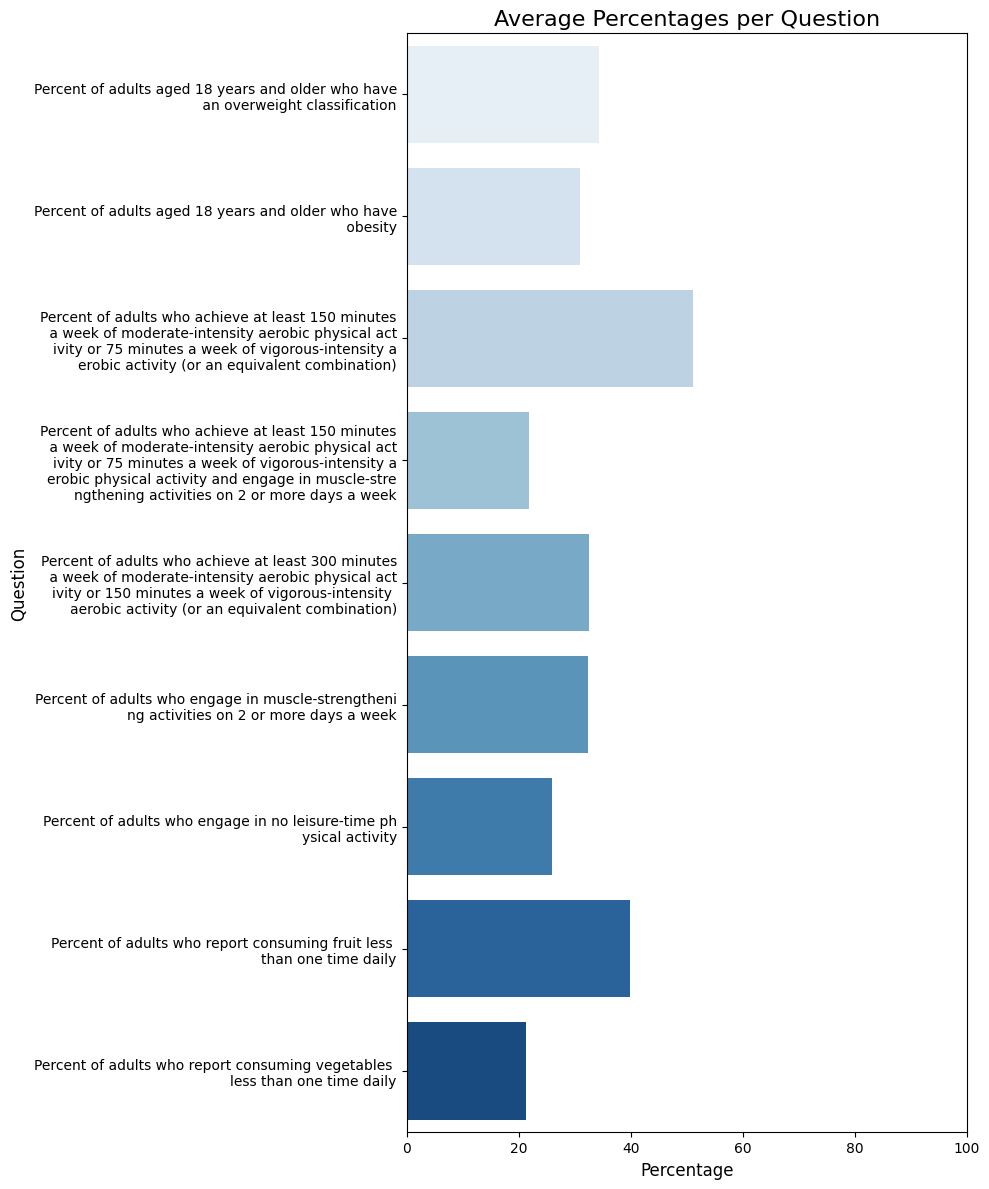

In [12]:
question_averages = df.groupby('Question')['Data_Value'].mean().reset_index()
question_averages['Question'] = question_averages['Question'].str.replace(
    r'(.{50})', r'\1\n', regex=True)  

plt.figure(figsize=(10, 12))
sns.barplot(data=question_averages, x='Data_Value', y='Question', palette='Blues')
plt.title('Average Percentages per Question', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Question', fontsize=12)
plt.xlim(0, 100) 
plt.tight_layout()
plt.show()

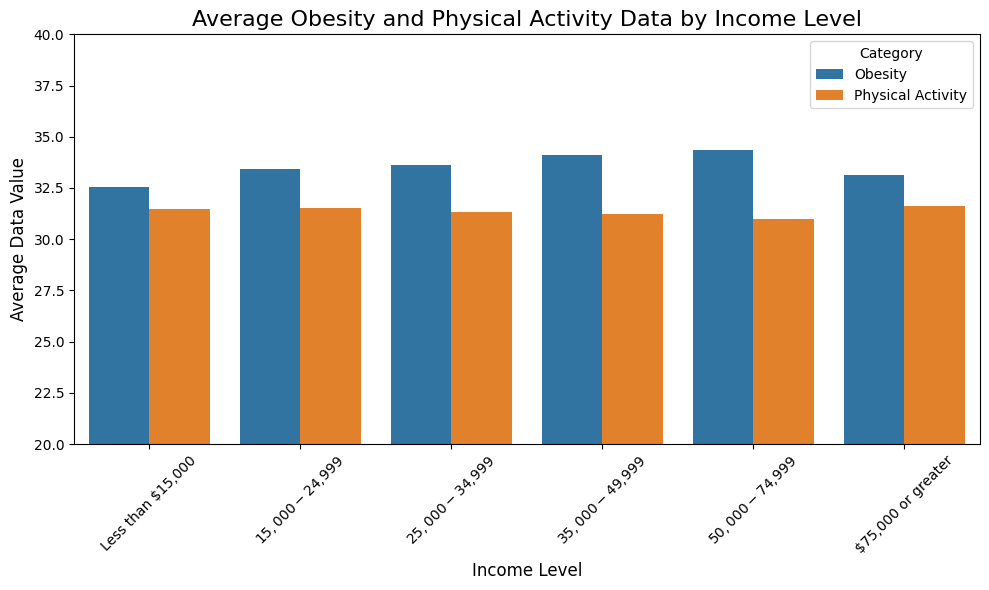

In [13]:
income_df = df[~df['Income'].isna()]

income_obesity_df = income_df[income_df['Class'] == 'Obesity / Weight Status']
income_activity_df = income_df[income_df['Class'] == 'Physical Activity']

obesity_avg = income_obesity_df.groupby('Income')['Data_Value'].mean().reset_index()
activity_avg = income_activity_df.groupby('Income')['Data_Value'].mean().reset_index()
income_avg = pd.merge(obesity_avg, activity_avg, on='Income', suffixes=('_Obesity', '_Physical_Activity'))

income_order = [
    'Less than $15,000', 
    '$15,000 - $24,999', 
    '$25,000 - $34,999', 
    '$35,000 - $49,999', 
    '$50,000 - $74,999', 
    '$75,000 or greater'
]
income_avg['Income'] = pd.Categorical(income_avg['Income'], categories=income_order, ordered=True)
income_avg = income_avg.sort_values('Income').dropna()

income_avg_melted = income_avg.melt(id_vars='Income', value_vars=['Data_Value_Obesity', 'Data_Value_Physical_Activity'],
                                    var_name='Class', value_name='Average Data Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Income', y='Average Data Value', hue='Class', data=income_avg_melted, ci=None)
plt.legend(title='Category', labels=['Obesity', 'Physical Activity'])
plt.title('Average Obesity and Physical Activity Data by Income Level', fontsize=16)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Average Data Value', fontsize=12)
plt.xticks(rotation=45)

plt.ylim(20, 40) 
plt.tight_layout()
plt.show()


### Correlation Analysis

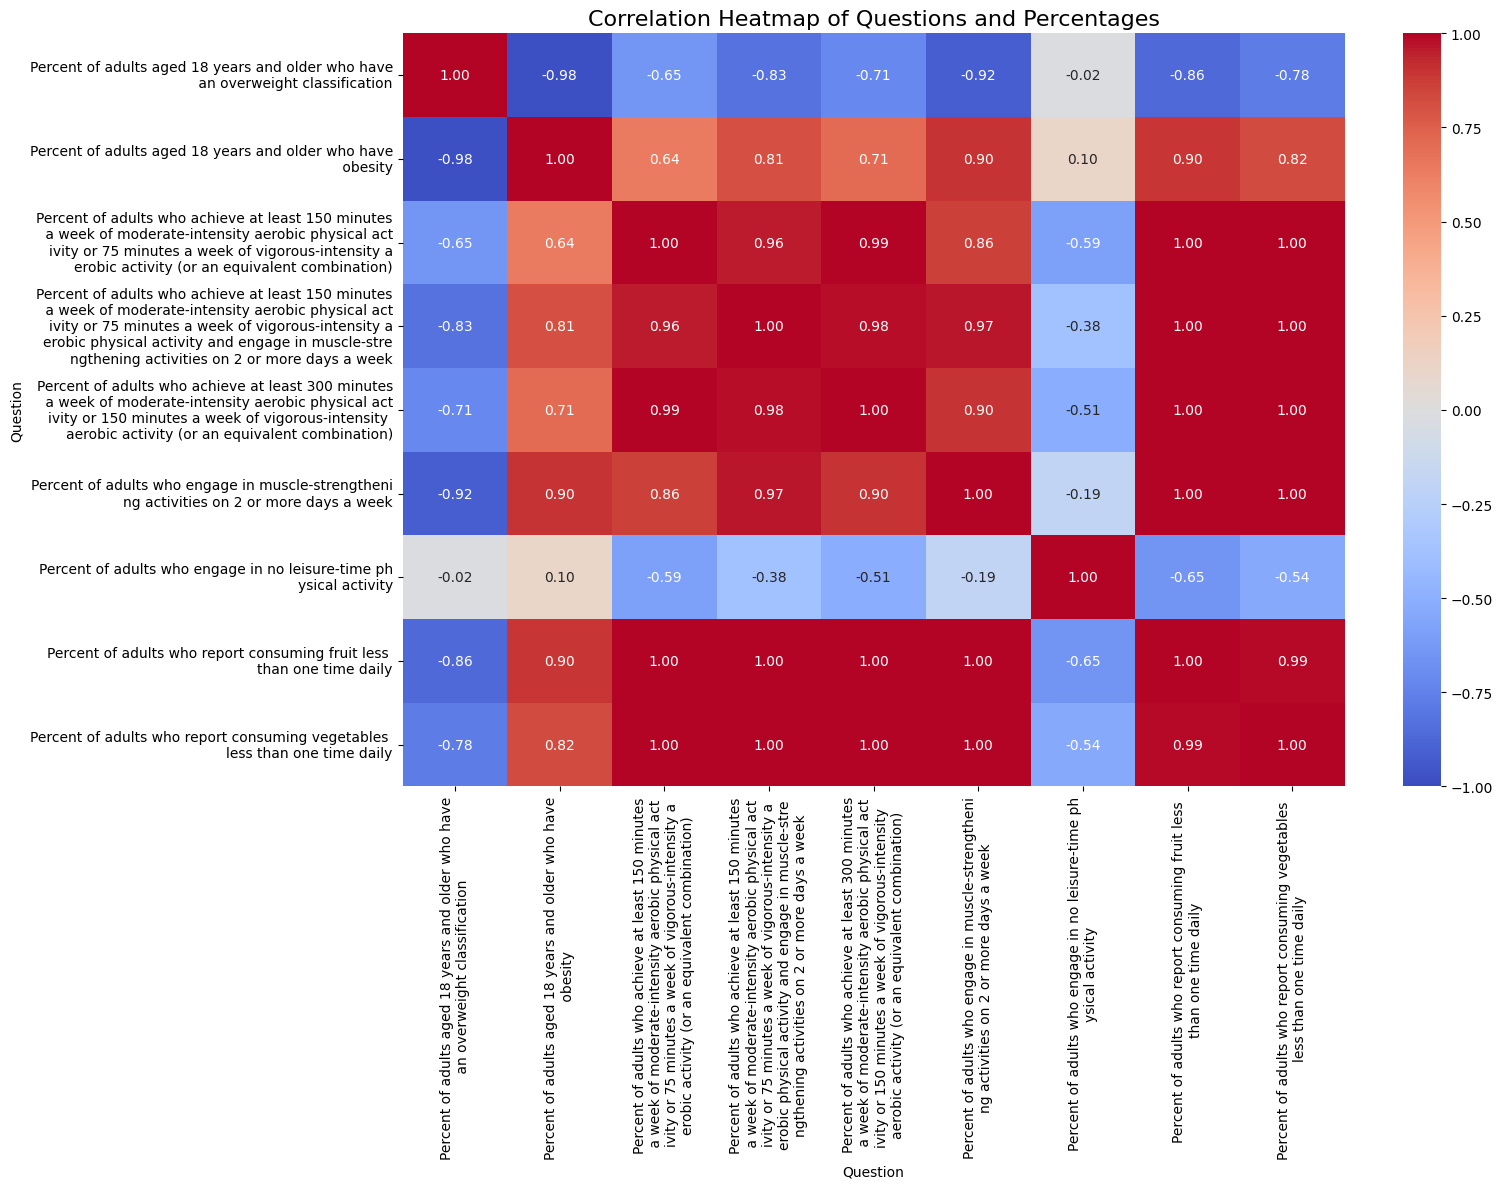

In [14]:
df_correlation = df.copy()
df_correlation['Question'] = df_correlation['Question'].str.replace(
    r'(.{50})', r'\1\n', regex=True)  
pivot_df = df_correlation.pivot_table(index='YearStart', columns='Question', values='Data_Value')
correlation_matrix = pivot_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    correlation_matrix,
    annot=True, 
    fmt=".2f",  
    cmap='coolwarm',  
    cbar=True,    
    vmin=-1, vmax=1 
)
plt.title('Correlation Heatmap of Questions and Percentages', fontsize=16)
plt.tight_layout()
plt.show()


### Geospatial Analysis

In [15]:
def generate_geo_map(df, reverse_colors=False):
    df_geo = df.groupby('GeoLocation')['Data_Value'].mean().reset_index()
    df_geo[['Latitude', 'Longitude']] = df_geo['GeoLocation'].str.strip('()').str.split(',', expand=True)
    df_geo['Latitude'] = df_geo['Latitude'].astype(float)
    df_geo['Longitude'] = df_geo['Longitude'].astype(float)
    
    m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    mean = df_geo['Data_Value'].mean()
    color_func = lambda x: 'red' if (x >= mean) ^ reverse_colors else 'green'
    
    for _, row in df_geo.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=8,  
            color=color_func(row['Data_Value']),
            fill=True,
            fill_opacity=0.7,
            popup=f"<strong>{round(row['Data_Value'], 2)}%</strong>"  
        ).add_to(m)
    
    return m


In [16]:
print("Obesity intensivity per state")
generate_geo_map(obesity_df, False)

Obesity intensivity per state


In [17]:
activity_df = df[df['Class'] == 'Physical Activity']
print("Activity intensivity per state")
generate_geo_map(activity_df, True)

Activity intensivity per state
